In [1]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


Step-1: Image Pre-processing

In [44]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout,Conv2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = (100,100)


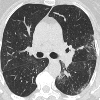

(100, 100, 3)


In [4]:


from google.colab.patches import cv2_imshow
a=cv2.imread("/content/drive/MyDrive/MLH Project/dataset/Covid/Patient/10.png")
a=cv2.resize(a,IMAGE_SIZE)
cv2_imshow(a)
print(a.shape)




In [5]:
path="/content/drive/MyDrive/MLH Project/dataset"

In [6]:
data=[]
c=0

for folder in os.listdir(path):
    sub_path=path+"/"+folder
    for folder2 in os.listdir(sub_path):
      sub_path2=sub_path+"/"+folder2
      for img in os.listdir(sub_path2):
        image_path=sub_path2+"/"+img        
        img_arr=cv2.imread(image_path)
        try:
          img_arr=cv2.resize(img_arr,IMAGE_SIZE)
          data.append(img_arr)
        except:
          c+=1
          continue
        

print("Number of images skipped= ",c)

Number of images skipped=  2


In [7]:
x=np.array(data)



In [8]:
x.shape

(4171, 100, 100, 3)

In [9]:
x=x/255.0


In [10]:

datagen = ImageDataGenerator(rescale = 1./255)
dataset = datagen.flow_from_directory(path,
                                      target_size = IMAGE_SIZE,
                                      batch_size = 32,
                                      class_mode = 'sparse')




Found 4171 images belonging to 3 classes.


In [11]:
dataset.class_indices

{'Covid': 0, 'Healthy': 1, 'Others': 2}

In [12]:
y=dataset.classes

In [13]:
y.shape

(4171,)

Step-2: Train-test-val split

In [14]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2)


In [15]:
x_train.shape,y_train.shape

((3002, 100, 100, 3), (3002,))

In [16]:
x_val.shape,y_val.shape

((751, 100, 100, 3), (751,))

In [17]:
x_test.shape,y_test.shape

((418, 100, 100, 3), (418,))

Step-3: Model building

In [56]:
model=Sequential()

#covolution layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))
#pooling layer
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())


#covolution layer
model.add(Conv2D(32,(3,3),activation='relu'))
#pooling layer
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

#covolution layer
model.add(Conv2D(64,(3,3),activation='relu'))
#pooling layer
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

#covolution layer
model.add(Conv2D(64,(3,3),activation='relu'))
#pooling layer
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

#i/p layer
model.add(Flatten())


#o/p layer
model.add(Dense(3,activation='softmax'))


model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_12 (Bat  (None, 49, 49, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_46 (Conv2D)          (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                     

In [57]:
#compile model:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [58]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

#Early stopping to avoid overfitting of model

In [59]:
history=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=30,callbacks=[early_stop],shuffle=True)

Epoch 1/30
94/94 [==============================] - 41s 426ms/step - loss: 0.9774 - accuracy: 0.5849 - val_loss: 0.9958 - val_accuracy: 0.5379
Epoch 2/30
94/94 [==============================] - 39s 418ms/step - loss: 0.6936 - accuracy: 0.7012 - val_loss: 1.0990 - val_accuracy: 0.3569
Epoch 3/30
94/94 [==============================] - 40s 424ms/step - loss: 0.5573 - accuracy: 0.7722 - val_loss: 0.9682 - val_accuracy: 0.5047
Epoch 4/30
94/94 [==============================] - 40s 429ms/step - loss: 0.4426 - accuracy: 0.8294 - val_loss: 1.3763 - val_accuracy: 0.3369
Epoch 5/30
94/94 [==============================] - 40s 423ms/step - loss: 0.3158 - accuracy: 0.9007 - val_loss: 1.1959 - val_accuracy: 0.4594
Epoch 6/30
94/94 [==============================] - 39s 418ms/step - loss: 0.2370 - accuracy: 0.9290 - val_loss: 0.6093 - val_accuracy: 0.7550
Epoch 7/30
94/94 [==============================] - 40s 420ms/step - loss: 0.1387 - accuracy: 0.9714 - val_loss: 0.5834 - val_accuracy: 0.7497

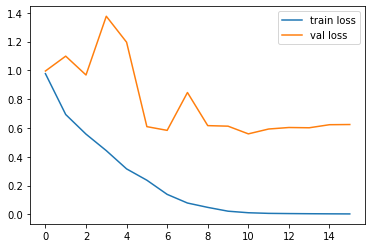

In [60]:
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend()

plt.savefig('loss-graph.png')
plt.show()

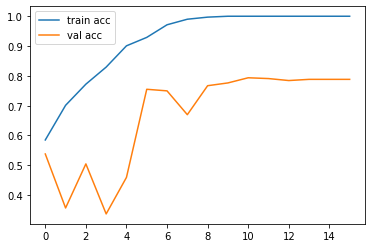

In [61]:
# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()

plt.savefig('acc-graph.png')
plt.show()

In [62]:
y_val_pred=model.predict(x_val)
y_val_pred=np.argmax(y_val_pred,axis=1)
print(classification_report(y_val_pred,y_val))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       432
           1       0.56      0.69      0.62       108
           2       0.77      0.77      0.77       211

    accuracy                           0.79       751
   macro avg       0.73      0.76      0.75       751
weighted avg       0.80      0.79      0.79       751



In [63]:
confusion_matrix(y_val_pred,y_val)

array([[354,  41,  37],
       [ 20,  75,  13],
       [ 30,  18, 163]])

In [64]:
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)

In [65]:
accuracy_score(y_pred,y_test)

0.7488038277511961

In [66]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80       243
           1       0.41      0.56      0.47        52
           2       0.77      0.81      0.79       123

    accuracy                           0.75       418
   macro avg       0.68      0.71      0.69       418
weighted avg       0.77      0.75      0.76       418



In [67]:
confusion_matrix(y_pred,y_test)

array([[184,  37,  22],
       [ 15,  29,   8],
       [ 18,   5, 100]])

In [68]:
model.save('/content/drive/MyDrive/MLH Project/model-recent.h5')